In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,BatchNormalization,Input,Bidirectional,Conv1D,MaxPooling1D,Flatten
from tensorflow.keras import regularizers
import tensorflow as tf
import numpy as np

In [2]:
df = []
for i in range(0,5):
    df.append(pd.read_csv(f'history_log_{i}.csv'))

In [3]:
model = Sequential([
    LSTM(100, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), input_shape=(256,3)),
    Dropout(0.2),

    Dense(2, activation = 'softmax') 
])

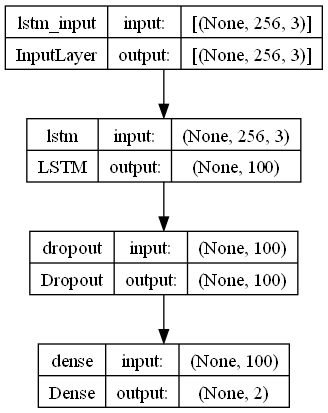

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True)

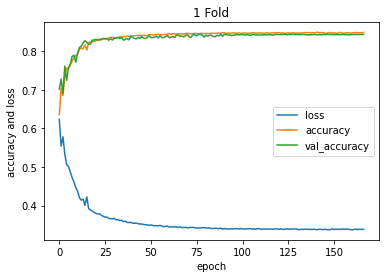

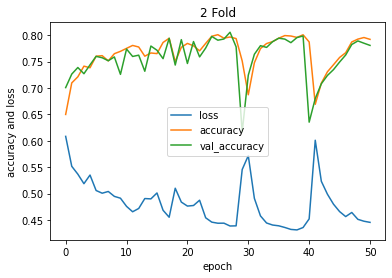

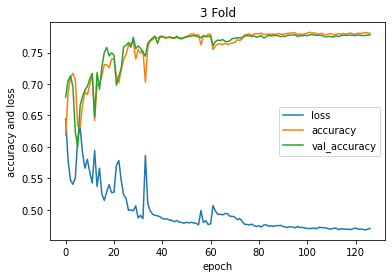

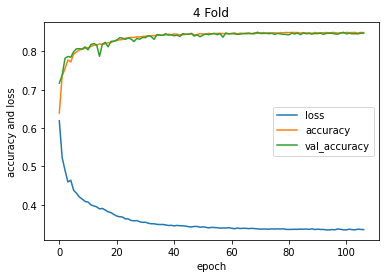

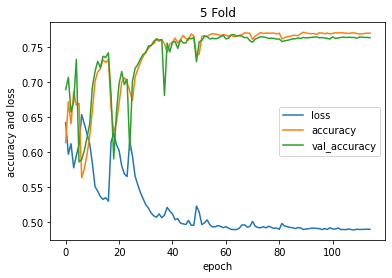

In [5]:
for i in range(len(df)):
    plot = df[i][:].reset_index()[['loss','accuracy','val_accuracy']].plot(title = f'{i+1} Fold',xlabel = 'epoch',ylabel = 'accuracy and loss')
    fig = plot.get_figure()
    fig.savefig(f'{i}_fold.png')

In [6]:
from IPython.display import display
for i in range(len(df)):
    display(df[i][df[i]['epoch']==0])

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.636285,0.623312,0.701833,0.559917


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.649871,0.608397,0.700674,0.564006


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.617971,0.644538,0.679232,0.585159


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.63911,0.618879,0.716929,0.545276


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.613648,0.642135,0.689607,0.585496


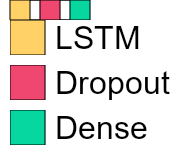

In [7]:
from PIL import ImageFont
import visualkeras
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font,draw_volume=False)  # font is optional!

In [8]:
table = []
for i in range(len(df)):
    display(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
    table.append(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
table = pd.concat(table)

,epoch,accuracy,loss,val_accuracy,val_loss
123,123,0.845594,0.338562,0.844517,0.339311


,epoch,accuracy,loss,val_accuracy,val_loss
27,27,0.796514,0.438779,0.805464,0.435491


,epoch,accuracy,loss,val_accuracy,val_loss
102,102,0.780987,0.470824,0.778662,0.469927


,epoch,accuracy,loss,val_accuracy,val_loss
69,69,0.846881,0.337245,0.849732,0.335102


,epoch,accuracy,loss,val_accuracy,val_loss
63,63,0.764883,0.489415,0.768286,0.483693


In [9]:
import pickle


with open('scores', 'rb') as f:
    unpickler = pickle.Unpickler(f)
    scores = unpickler.load()


with open('evaluations', 'rb') as f:
    unpickler = pickle.Unpickler(f)
    scores = unpickler.load()


EOFError: Ran out of input

In [ ]:
scores = np.asarray(scores).T

NameError: name 'scores' is not defined

In [ ]:
scores

array([[0.8701699 , 0.8703204 , 0.8700194 ],
       [0.8550865 , 0.8553825 , 0.85479075],
       [0.84344184, 0.84364617, 0.84323764],
       [0.84870076, 0.8489064 , 0.8484953 ],
       [0.7249767 , 0.72515225, 0.7248011 ]], dtype=float32)

In [ ]:
df3 = pd.DataFrame(scores,columns = ['f1','recalls','precisions'])

In [ ]:
df3

NameError: name 'df3' is not defined

In [ ]:
np.asarray(evaluations)[:,1]

array([0.87008852, 0.85527498, 0.84330684, 0.84863371, 0.72507781])

In [ ]:
df3

NameError: name 'df3' is not defined

In [ ]:
df2 = table[['accuracy','val_accuracy','epoch']].reset_index()
df2 = pd.concat([df2,df3],axis = 1)
df2['test_accuracy'] = np.asarray(evaluations)[:,1]


NameError: name 'df3' is not defined

In [ ]:
s = pd.DataFrame([df2.sum()])/5

In [ ]:
df2 = pd.concat([df2,s])

In [ ]:
df2 = ((df2*10000)//1)/10000

In [ ]:
df2.to_csv('table.csv')

In [ ]:
df2

,index,accuracy,val_accuracy,epoch
0,27.0,0.7965,0.8054,27.0
1,102.0,0.7809,0.7786,102.0
2,69.0,0.8468,0.8497,69.0
3,63.0,0.7648,0.7682,63.0
0,52.2,0.6378,0.6404,52.2
